In [222]:
import numpy as np
from SERGIO.GRN import grn_from_human,grn_from_networkx,grn_random_graph
from SERGIO._sergio import sergio
from SERGIO.MR import mrProfile
import pandas as pd
import copy
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
from SERGIO.GRN._grn import GRN
import random
from SERGIO.GRN._components import Gene, SingleInteraction

- need 10000 cells to have the distribution of cells matching  when you repeat from h
I take a master regulator and I change its transcription. If I take as initial condition the final state of the unperturbed trajectory, I do not observe a drammatic change in the dynamics

In [3]:
grn0 = grn_random_graph(20)
G = grn0.to_networkx()


In [134]:
grn = copy.deepcopy(grn0)
mrs = grn.get_mrs()
mr_profs = mrProfile(MR_names = mrs, n_types = 1)
mr_profs.build_rnd(range_dict={'L': [1, 2.5], 'H': [3.5, 5]})
grn.init(mr_profs, update_half_resp = True)
sim = sergio(grn)

In [135]:

%time sim.simulate(nCells = 10000, noise_s = 1, safety_iter = 150, scale_iter = 10)
expr = sim.getSimExpr()

CPU times: user 1min 19s, sys: 134 ms, total: 1min 19s
Wall time: 1min 19s


use as initial condition empty simulation

In [5]:
scale_prod = 1
#grn1 = copy.deepcopy(grn)#to use as initial condition the endpoint of previous simulation
grn1 = copy.deepcopy(grn0)#to use as initial condition empty simulation
mrs = grn1.get_mrs()

target_gene = list(mr_profs.profile.keys())[0]
crispr = copy.deepcopy(mr_profs)
crispr.profile[target_gene]=mr_profs.profile[target_gene]*scale_prod
grn1.init(crispr, update_half_resp = True)
sim3 = sergio(grn1)
%time sim3.simulate(nCells = 10000, noise_s = 1, safety_iter = 150, scale_iter = 10)
expr3 = sim3.getSimExpr()

CPU times: user 11min 27s, sys: 196 ms, total: 11min 27s
Wall time: 11min 28s


array([2.19487868])

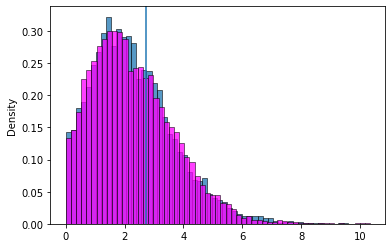

In [11]:
sns.histplot(expr.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == target_gene][0]],stat = 'density')
sns.histplot(expr3.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == target_gene][0]],stat = 'density',color='magenta')
plt.axvline(grn.attr_['genes'][target_gene].ss_conc_/0.8)
grn1.attr_['genes'][target_gene].ss_conc_


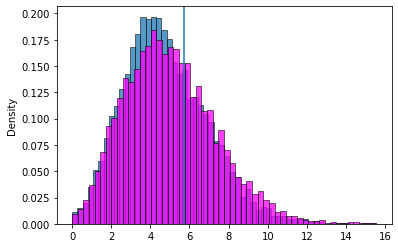

In [27]:
gene_nonmr = random.sample(set(grn.attr_['genes'])-grn.attr_['mrs'],1)[0]
sns.histplot(expr.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == gene_nonmr][0]],stat = 'density')
sns.histplot(expr3.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == gene_nonmr][0]],stat = 'density',color='magenta')
plt.axvline(grn.attr_['genes'][gene_nonmr].ss_conc_/0.8)


'66'

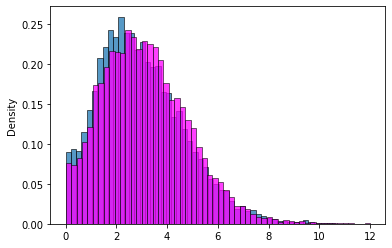

In [19]:

gene_mr = random.sample(grn.attr_['mrs'],1)[0]
sns.histplot(expr.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == gene_mr][0]],stat = 'density')
sns.histplot(expr3.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == gene_mr][0]],stat = 'density',color='magenta')
grn.attr_['genes'][gene_mr]._calc_prod([0]),grn1.attr_['genes'][gene_mr]._calc_prod([0])
plt.axvline(grn.attr_['genes'][gene_r].ss_conc_/0.8)


# understanding perturbation

 use as initial condition the endpoint of previous simulation

In [244]:
scale_prod = 4.
grn1 = copy.deepcopy(grn)#to use as initial condition the endpoint of previous simulation
#grn1 = copy.deepcopy(grn0)#to use as initial condition empty simulation
mrs = grn1.get_mrs()
target_gene = list(mr_profs.profile.keys())[0]
crispr = copy.deepcopy(mr_profs)
crispr.profile[target_gene]=mr_profs.profile[target_gene]*scale_prod
#clear up previous stationary point trajectory
for g in grn1.attr_['genes'].values():
    g.sim_conc_ = defaultdict(list) 
    
grn1.init(crispr, update_half_resp = False)
sim2 = sergio(grn1)
sim2.simulate(nCells = 10000, noise_s = 1, safety_iter = 150, scale_iter = 10)
expr2 = sim2.getSimExpr()

(array([4.7146265]), array([18.85850599]))

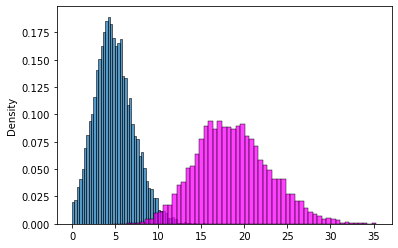

In [241]:
sns.histplot(expr.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == target_gene][0]],stat = 'density')
sns.histplot(expr2.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == target_gene][0]],stat = 'density',color='magenta')
grn.attr_['genes'][target_gene].ss_conc_,grn1.attr_['genes'][target_gene].ss_conc_

In [164]:
sim2.grn_.attr_['genes'][target_gene]._calc_prod([0], regs_conc = 'sim'),sim.grn_.attr_['genes'][target_gene]._calc_prod([0], regs_conc = 'sim')
sim2.grn_.attr_['genes'][target_gene].ss_conc_,sim.grn_.attr_['genes'][target_gene].ss_conc_

(array([18.85850599]), array([4.7146265]))

In [242]:

pd.DataFrame([[a,b,d['weight']] for a,b,d in list(G.out_edges(target_gene,data=True))],columns=[['from','to','weight']])

,from,to,weight
0,8,2,2.644088
1,8,6,-3.209890
2,8,7,-3.514658
3,8,9,2.140007


In [174]:
[*G.predecessors('9')]

['8', '10', '12', '14']

[2.99117042] [5.14378576]


(3.093554280347654, 5.402171984179716)

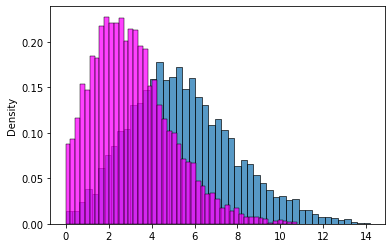

In [249]:
j = '7'
sns.histplot(expr.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == j][0]],stat = 'density')
sns.histplot(expr2.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == j][0]],stat = 'density',color='magenta')
print(sim2.grn_.attr_['genes'][j].ss_conc_,sim.grn_.attr_['genes'][j].ss_conc_)
expr2.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == j][0]].mean(),expr.values[np.arange(len(grn.attr_['genes']))[np.array(list(grn.attr_['genes'].keys())) == j][0]].mean()

In [165]:
sim2.grn_.attr_['genes'][j]._calc_prod(cTypes = [0], regs_conc = 'ss'),sim.grn_.attr_['genes'][j]._calc_prod(cTypes = [0], regs_conc = 'ss')
#sim2.grn_.attr_['genes'][j]._calc_prod(cTypes = [0], regs_conc = 'sim'),sim.grn_.attr_['genes'][j]._calc_prod(cTypes = [0], regs_conc = 'sim')

(array([6.38353307]), array([6.38353307]))

In [180]:
len(grn.attr_['genes'][j].sim_conc_[0]),len(grn1.attr_['genes'][j].sim_conc_[0])
ret = np.zeros(shape = (len(cTypes),))
for i in sim2.grn_.attr_['genes'][j].inInteractions.keys():
            print(i)
            ret += sim2.grn_.attr_['genes'][j].inInteractions[i]._get_hill(cTypes, regs_conc = 'ss')
            print(sim2.grn_.attr_['genes'][j].inInteractions[i]._get_hill(cTypes, regs_conc = 'ss'),sim.grn_.attr_['genes'][j].inInteractions[i]._get_hill(cTypes, regs_conc = 'ss'))
sim2.grn_.attr_['genes'][j].inInteractions

8-9
[1.07000351] [1.07000351]
10-9
[1.80512757] [1.80512757]
12-9
[1.63101882] [1.63101882]
14-9
[1.87738317] [1.87738317]


{'8-9': <SERGIO.GRN._components.SingleInteraction at 0x7f2088318430>,
 '10-9': <SERGIO.GRN._components.SingleInteraction at 0x7f20883184f0>,
 '12-9': <SERGIO.GRN._components.SingleInteraction at 0x7f2088318f10>,
 '14-9': <SERGIO.GRN._components.SingleInteraction at 0x7f2088318fa0>}

In [204]:
print(sim2.grn_.attr_['genes'][j].inInteractions['8-9']._get_hill( cTypes, regs_conc = 'ss'))
sim2.grn_.attr_['genes'][j].inInteractions['8-9'].n_,sim2.grn_.attr_['genes'][j].inInteractions['8-9'].h_,sim2.grn_.attr_['genes'][j].inInteractions['8-9'].reg_[0].ss_conc_[0],sim2.grn_.attr_['genes'][j].inInteractions['8-9'].k_

[1.07000351]


(2.0, 18.858505989444925, 18.858505989444925, 2.14000702088076)

In [150]:
cTypes = [0]
print(grn.attr_['genes'][j]._calc_prod([0], regs_conc = 'sim'),grn1.attr_['genes'][j]._calc_prod([0], regs_conc = 'sim'))
x = grn.attr_['genes'][j].get_last_conc(cTypes)
p = grn.attr_['genes'][j]._calc_prod([0], regs_conc = 'sim')
dt = 0.01
def update(x0,p,dt):
    x = x0
    rndP = np.random.normal()
    rndD = np.random.normal()
    D = 0.8*x
    newx = x + (p - D)*dt + (np.multiply(np.sqrt(p),rndP) + np.multiply(np.sqrt(D),rndD))*1*np.sqrt(dt)
    x = max(newx,0)
    return x


[4.08452014] [5.8722576]


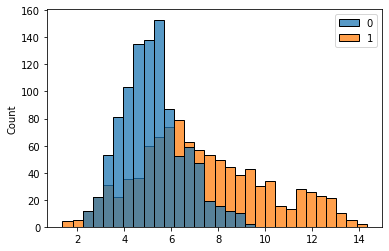

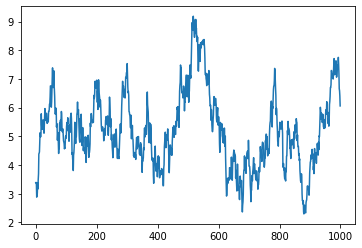

In [151]:
new_x = x
new_x2 = x
a = []
b = []
for _ in range(1000):
    new_x =update(new_x,p,dt)
    a+=[new_x[0]]
    new_x2 =update(new_x2,1.5*p,dt)
    b+=[new_x2[0]]

x,new_x
sns.histplot([a,b])
plt.figure()
plt.plot(a)


In [105]:

sim.grn_.attr_['genes'][target_gene].ss_conc_,sim2.grn_.attr_['genes'][target_gene].ss_conc_


(array([1.92137693]), array([7.68550774]))

In [88]:
grn0.attr_['genes'][sim.gNames_[1]].ss_conc_

In [78]:
grn0.attr_['genes'][sim.gNames_[1]]._calc_prod([0])

TypeError: 'NoneType' object is not subscriptable

In [84]:
for g in grn0.attr_['mrs']:
    grn0.attr_['genes'][g].isMR_ = True
grn0._set_levels()
grn0._set_MR_profile(mr_profs)
grn0._estimate_params(half_resp = True)

In [56]:
sorted(set(grn0.attr_['mrs'])),sorted( set(mr_profs.profile.keys()))

(['11', '16', '22', '25', '30', '33', '36', '4', '64', '72', '9'],
 ['11', '16', '22', '25', '30', '33', '36', '4', '64', '72', '9'])

In [61]:
def init(self, mr_profile, update_half_resp = True):
    for g in self.attr_['mrs']:
        self.attr_['genes'][g].isMR_ = True
    self._set_levels()
    self._set_MR_profile(mr_profile)
    self._estimate_params(half_resp = update_half_resp)
